# Exploring 1-tile ShapePipe tutorial results

This is a simple notebook to explore the tutorial results of the tutorial_sp_shear_individual.sh script.

In [1]:
import os
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patheffects as pfx 
from astropy.table import Table
plt.style.use('ggplot')

Directories

In [2]:
output_dir = "output"
images_dir = "images_out"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
output_list = sorted(next(os.walk(output_dir))[1])
print(*output_list,sep="\n")
tile = "246-290"

run_sp_exp_Cp_2021-01-15_17-23-47
run_sp_exp_Gi_2021-01-15_16-31-13
run_sp_exp_Ma_2021-01-15_16-41-51
run_sp_exp_Mh_2021-01-15_16-41-44
run_sp_exp_Mst_2021-01-15_17-23-48
run_sp_exp_Psi_2021-01-15_17-23-29
run_sp_exp_Psm_2021-01-15_16-58-24
run_sp_exp_Se_2021-01-15_16-54-48
run_sp_exp_Sp_2021-01-15_16-31-15
run_sp_exp_Sx_2021-01-15_16-45-54
run_sp_tile_Fe_2021-01-15_16-31-11
run_sp_tile_Gi_2021-01-15_16-31-06
run_sp_tile_Ma_2021-01-15_17-31-41
run_sp_tile_Ms_2021-01-18_15-29-20
run_sp_tile_Psi_2021-01-15_17-34-18
run_sp_tile_Sh1
run_sp_tile_Sh2
run_sp_tile_Sh3
run_sp_tile_Sh4
run_sp_tile_Sh5
run_sp_tile_Sh6
run_sp_tile_Sh7
run_sp_tile_Sh8
run_sp_tile_Sm_2021-01-15_17-35-40
run_sp_tile_Sx_2021-01-15_17-31-49
run_sp_tile_Uz_2021-01-15_16-31-08
run_sp_tile_Viw_2021-01-15_17-35-23
run_sp_tile_Vix_2021-01-15_17-37-14


## PSF

In [3]:
full_starcat = Table.read("psf_validation/full_starcat.fits")
full_starcat

<Table length=4412>
        X                  Y                  RA         ... ACCEPTED CCD_NB
     float64            float64            float64       ...  int16   int64 
------------------ ------------------ ------------------ ... -------- ------
1012.5018731968863  835.4301568466705 213.26784205321715 ...        1      4
1532.5464122489138 4353.8376468498445 213.31733586163168 ...        1      4
1734.3327536859138  3600.516383253235  213.3356333854531 ...        1      4
1764.2347622524144  4107.852453433839 213.33857522645314 ...        1      4
1976.1151004124833 3351.6447203591547 213.35782929891403 ...        1      4
1489.1326045772266  4441.839904402009 213.31337432088628 ...        1      4
  83.0643383057123 2877.6766903251637 213.18305233385072 ...        1      4
315.44213280417176  87.00752215112296  213.2029622441545 ...        1      4
1952.1956715877438 2921.0702825857834 213.35547575979768 ...        1      4
1319.3340734437406 2424.7419526838844 213.29689388025454 ...        1      4
               ...                ...                ... ...      ...    ...
 931.2258548808871 2280.5895578018976 214.82753034428308 ...        1     36
1477.8768828331456  923.0341563064603 214.51275745044114 ...        1     21
 1048.954545113889  656.2119532113173 214.55156628930965 ...        1     21
223.28368037979573 2327.9570453782967  214.6260716935291 ...        1     21
1938.4950294236562  2857.065098386497  214.4706243598149 ...        1     21
 683.9949494130207 3640.9472371738557  214.5842075970512 ...        1     21
1015.7826192028696  4518.711208215911    214.55398035794 ...        1     21
1656.5660092131013  1895.325522555602 214.49638754121986 ...        1     21
 626.5234610233956 1525.3857363114166  214.5896430798516 ...        1     21
1567.9434369168305 2273.8582685252377 214.50432608151976 ...        1     21

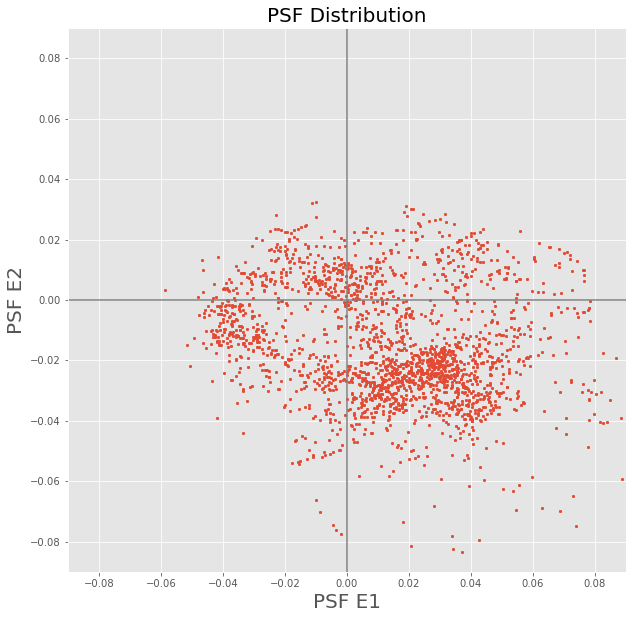

In [4]:
plt.figure(figsize=(10,10))
boxsize=0.09
plt.scatter(full_starcat['E1_PSF_HSM'],full_starcat['E2_PSF_HSM'],s=5)
plt.plot([-boxsize,boxsize],[0,0],"-",color="gray")
plt.plot([0,0],[-boxsize,boxsize],"-",color="gray")
plt.xlim([-boxsize,boxsize])
plt.ylim([-boxsize,boxsize])
plt.xlabel("PSF E1",fontsize=20)
plt.ylabel("PSF E2",fontsize=20)
plt.title("PSF Distribution",fontsize=20)
plt.savefig("images_out/psf_scatter_HSM.png",bbox_inches="tight")

## Sextractor Catalog

In [5]:
sexcat = Table.read(  output_dir +"/"
                    + [sx_dir for sx_dir in output_list if 'tile_Sx' in sx_dir][0] #searches the full sextractor catalog over the tile
                    + "/sextractor_runner/output/sexcat_sexcat-"
                    + tile 
                    + ".fits",hdu=2)
sexcat

<Table length=24384>
  NUMBER   EXT_NUMBER  FLUX_AUTO   ...        VIGNET [51,51]        N_EPOCH
                           ct      ...              ct                     
  int32      int16      float32    ...           float32             int32 
---------- ---------- ------------ ... ---------------------------- -------
         1          1      1803332 ...     9.933519 ..     11.15689       3
         2          1      1639832 ...     6.229863 ..     6.282947       3
         3          1     17900.63 ...   -0.6480175 ..    -4.747374       2
         4          1      22203.9 ...    0.4728882 ..     2.703713       2
         5          1     17400.39 ...       -1e+30 ..    -3.474557       2
         6          1 1.284271e+07 ...     119.7579 ..     86.14201       2
         7          1       442959 ...    -1.780178 ..    0.2008466       2
         8          1     419704.1 ...       -1e+30 ..     45.85828       2
         9          1     15243.93 ...       -1e+30 ..       -1e+30       2
       ...        ...          ... ...                          ...     ...
     24375          1     4564.576 ...       -1e+30 ..    -3.331661       2
     24376          1     467.4773 ...    0.1780139 ..    -1.360573       2
     24377          1     522.2943 ...     3.217175 ..     1.487385       4
     24378          1     177.3588 ...    -3.209678 ..   -0.7233137       2
     24379          1     1527.063 ...    -2.719626 ..    -2.657052       3
     24380          1     68834.78 ...    -4.265476 ..     1.393448       3
     24381          1     607.6863 ...    -1.457538 ..    0.3830816       3
     24382          1     213.2479 ...   -0.8336318 ..    -2.936654       2
     24383          1     385.0209 ...     1.942581 ..     3.379167       3
     24384          1     122.2096 ...    0.3606564 ..   -0.2772161       3

## Shear Measurements

The following functions create a set of points arranged in an ellipse around (0,0) and apply a given shear/magnification to them. 

In [6]:
def ellipse(points=100,size=1,eccentricity=0,theta=0):
    """Create a simple set of points arranged in an ellipse"""
    angles = np.linspace(0,2*np.pi,points)
    radii = size/np.sqrt(1-(eccentricity*np.sin(angles))**2 )
    points = np.array([radii*np.sin(angles),radii*np.cos(angles)])
    Matrix = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    points = np.dot(Matrix,points).T
    return points

def shear(points, gamma1=0, gamma2=0, kappa=0):
    """Applies shear to a set of points"""
    Lensing = np.array([[1-kappa+gamma1,gamma2],[gamma2,1-kappa-gamma1]])
    sheared_points = np.dot(Lensing,points.T).T
    return sheared_points

To investigate the unmerged catalogs from the shape measurements, select a shape measurement sub process. Let's inspect a sample of objects detected by sextractor and with ellipticity measurements from ngmix.

In [7]:
subproc=3

shearcatngmix = Table.read(output_dir
                      + "/run_sp_tile_Sh{}/".format(subproc) #shear measurement subprocess
                      + "ngmix_runner/output/ngmix-" 
                      + tile
                      +".fits",hdu=2)

#Select from sextractor catalog only objects that are in this subprocess
subcat = sexcat[(sexcat['NUMBER']>=min(shearcatngmix['id']))&
                (sexcat['NUMBER']<=max(shearcatngmix['id']))]

Plot a random sample of objects:

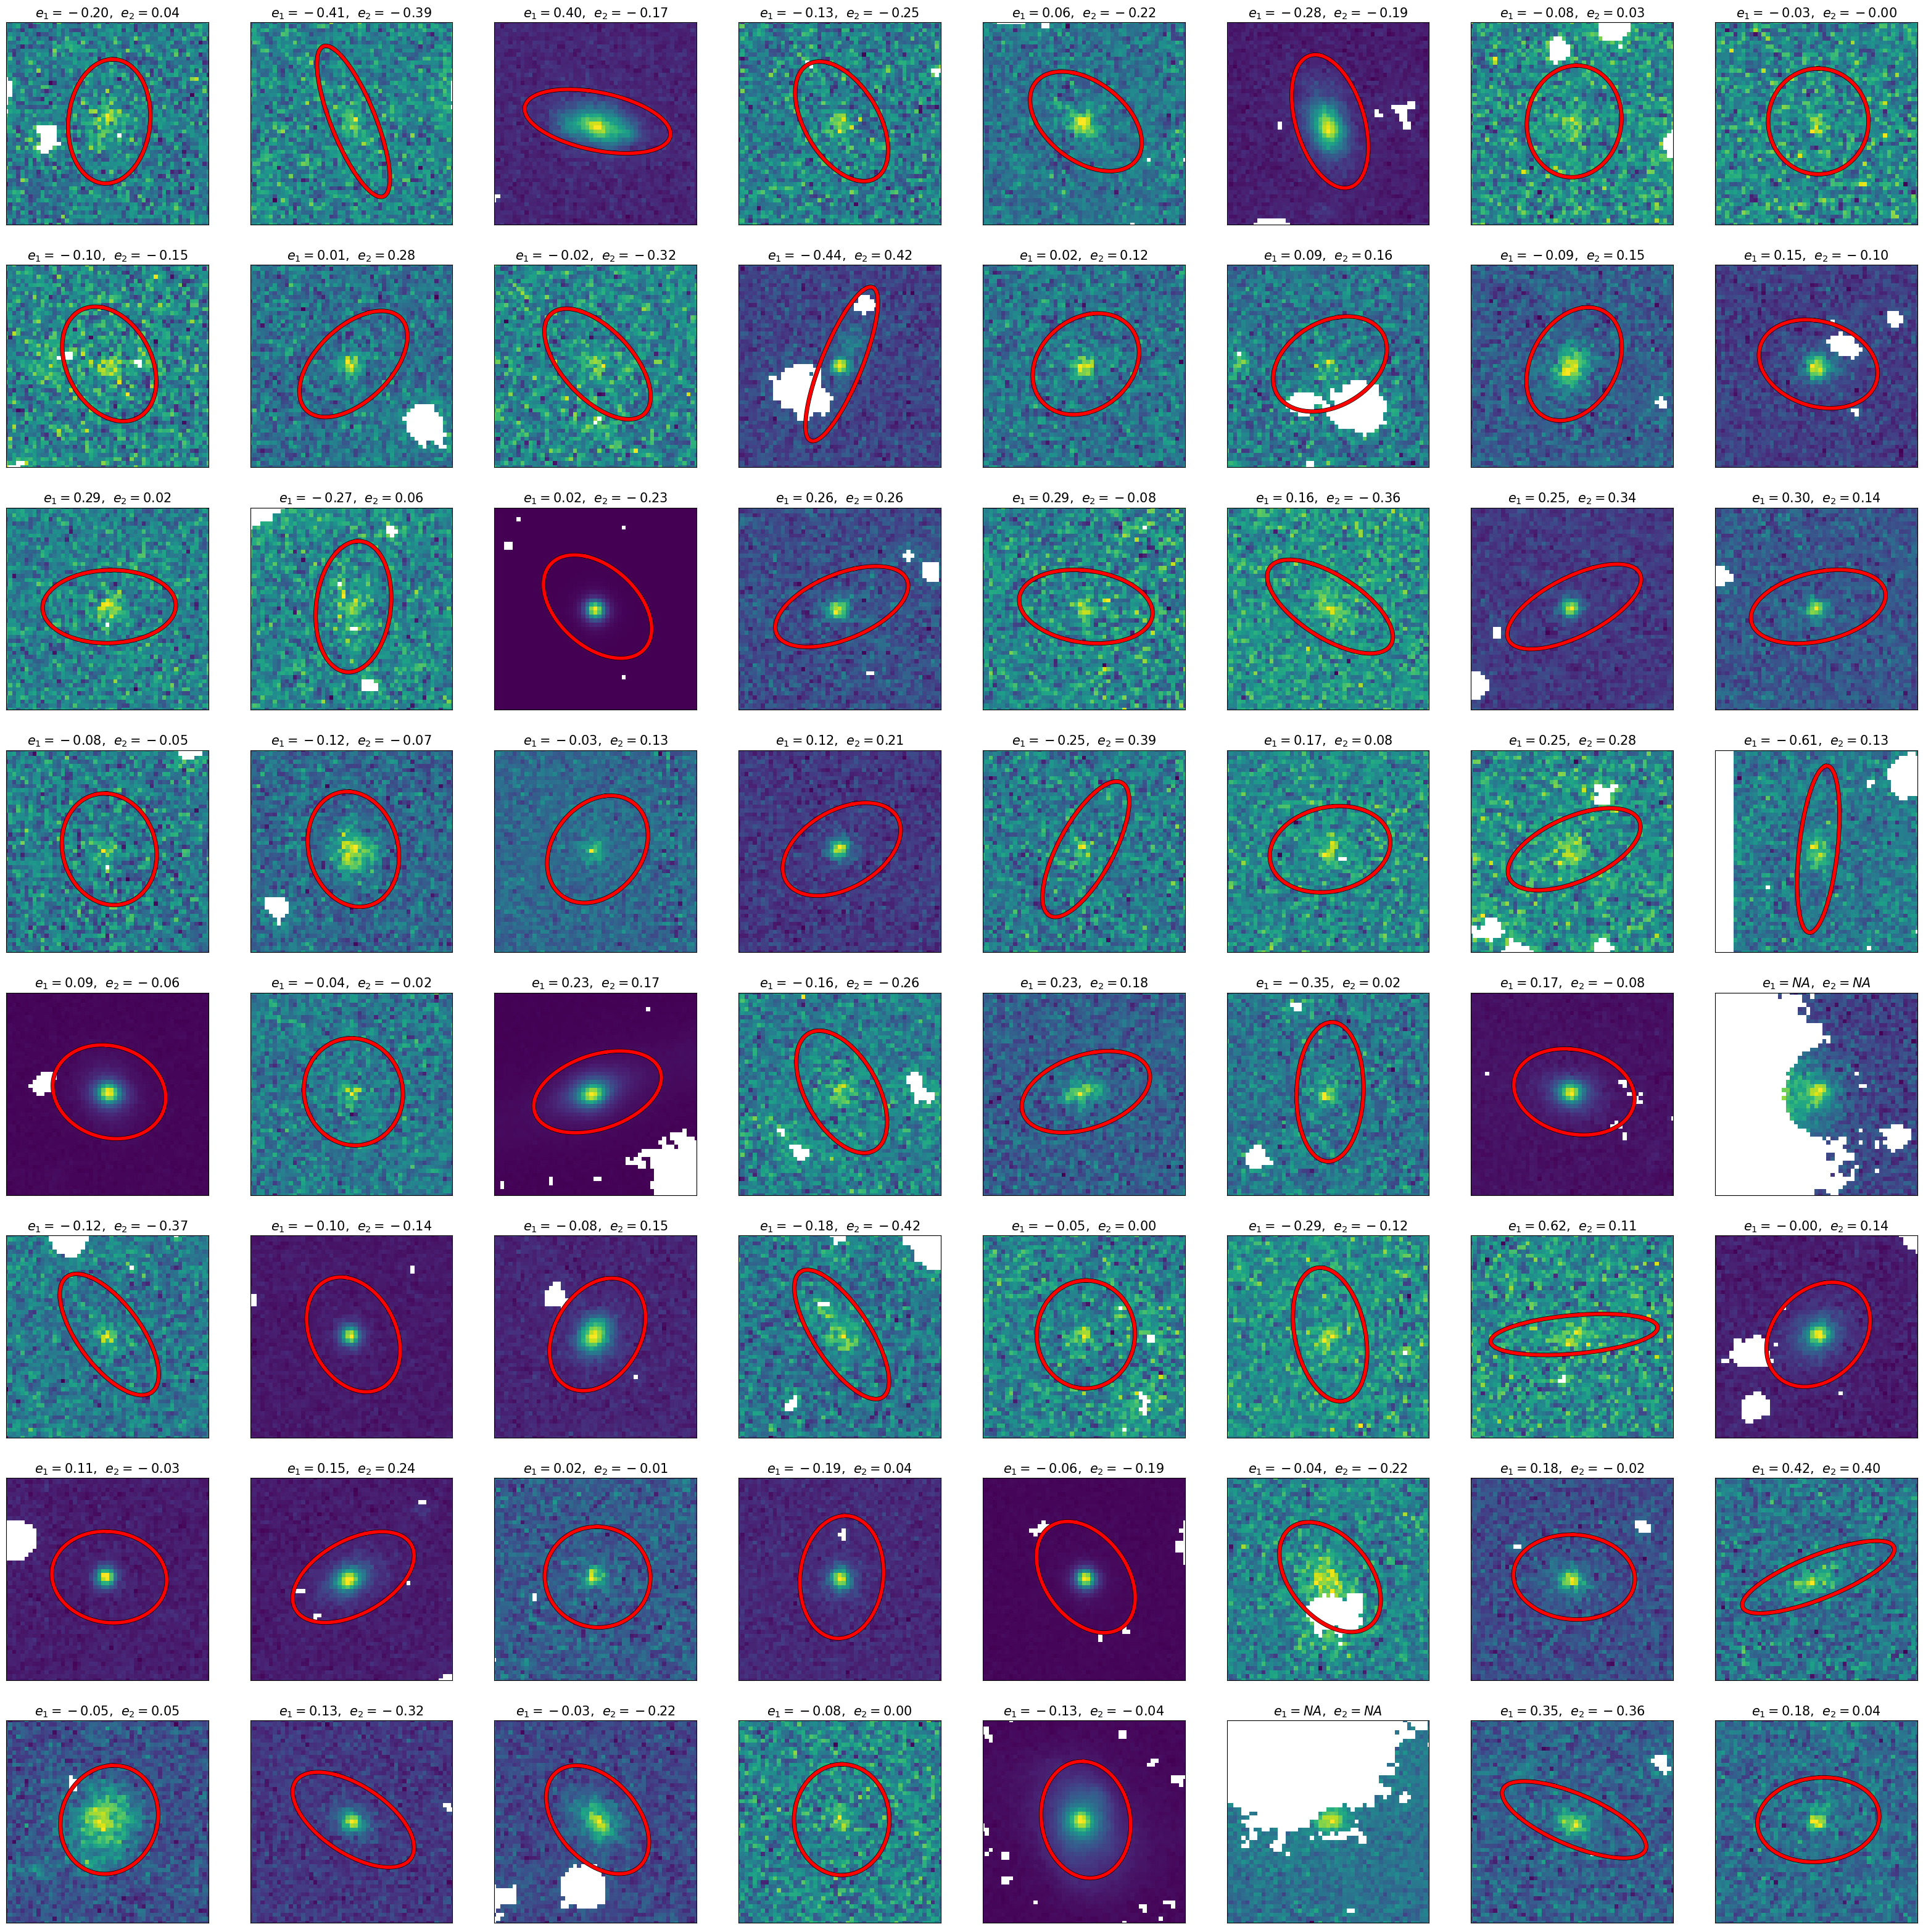

In [8]:
stamp_size = 51
plotlines = 8
plotcols = 8
N_sample = plotlines*plotcols
sample = np.random.randint(0, len(subcat)-1, size=N_sample)
plt.rcParams.update(plt.rcParamsDefault)

plt.figure(figsize=(40,40))

for i in range(N_sample):
    sub = plt.subplot(plotlines,plotcols,i+1)
    index = sample[i]
    
    stamp = np.array(subcat[index]['VIGNET'])
    masked_stamp = np.ma.masked_where(stamp == -1e+30, stamp)
    sub.imshow(masked_stamp)
    
    identity = subcat[index]['NUMBER']
    g1 = shearcatngmix[shearcatngmix['id']==identity]['g1']
    g2 = shearcatngmix[shearcatngmix['id']==identity]['g2']
    try:
        g1 = float(g1)
        g2 = float(g2)
        elipse = ellipse(size=stamp_size/4)
        sheared_elipse = shear(elipse,g1,g2,0)
        #contoured ellipses
        sub.plot(sheared_elipse[:,0]+stamp_size/2,
                 sheared_elipse[:,1]+stamp_size/2,
                 color='red',
                 lw=4, 
                 path_effects=[pfx.Stroke(linewidth=5, foreground='k'), pfx.Normal()])
        sub.set_title("$e_1 = {:.2f}$,  $e_2 = {:.2f}$".format(g1,g2),fontsize=15)
    except:
        sub.set_title("$e_1 = NA $,  $e_2 = NA$",fontsize=15)
    
    #plot configs
    sub.tick_params(labelleft=False,left=False)
    sub.axes.get_xaxis().set_visible(False)
    sub.set_xlim(0,stamp_size-1)
    sub.set_ylim(0,stamp_size-1)

plt.savefig(images_dir+
            "/shapepipe_cfis_test_subprocess{}_epoch{}_ngmix_{}.png".format(subproc,epoch,time.time()),
            bbox_inches='tight') 

Let's do the same with galsim (HSM) fit images:

In [9]:
shearcatgalsim = Table.read(output_dir
                      + "/run_sp_tile_Sh{}/".format(subproc) 
                      + "galsim_shapes_v2_runner/output/galsim-" 
                      + tile
                      +".fits",hdu=epoch+1)

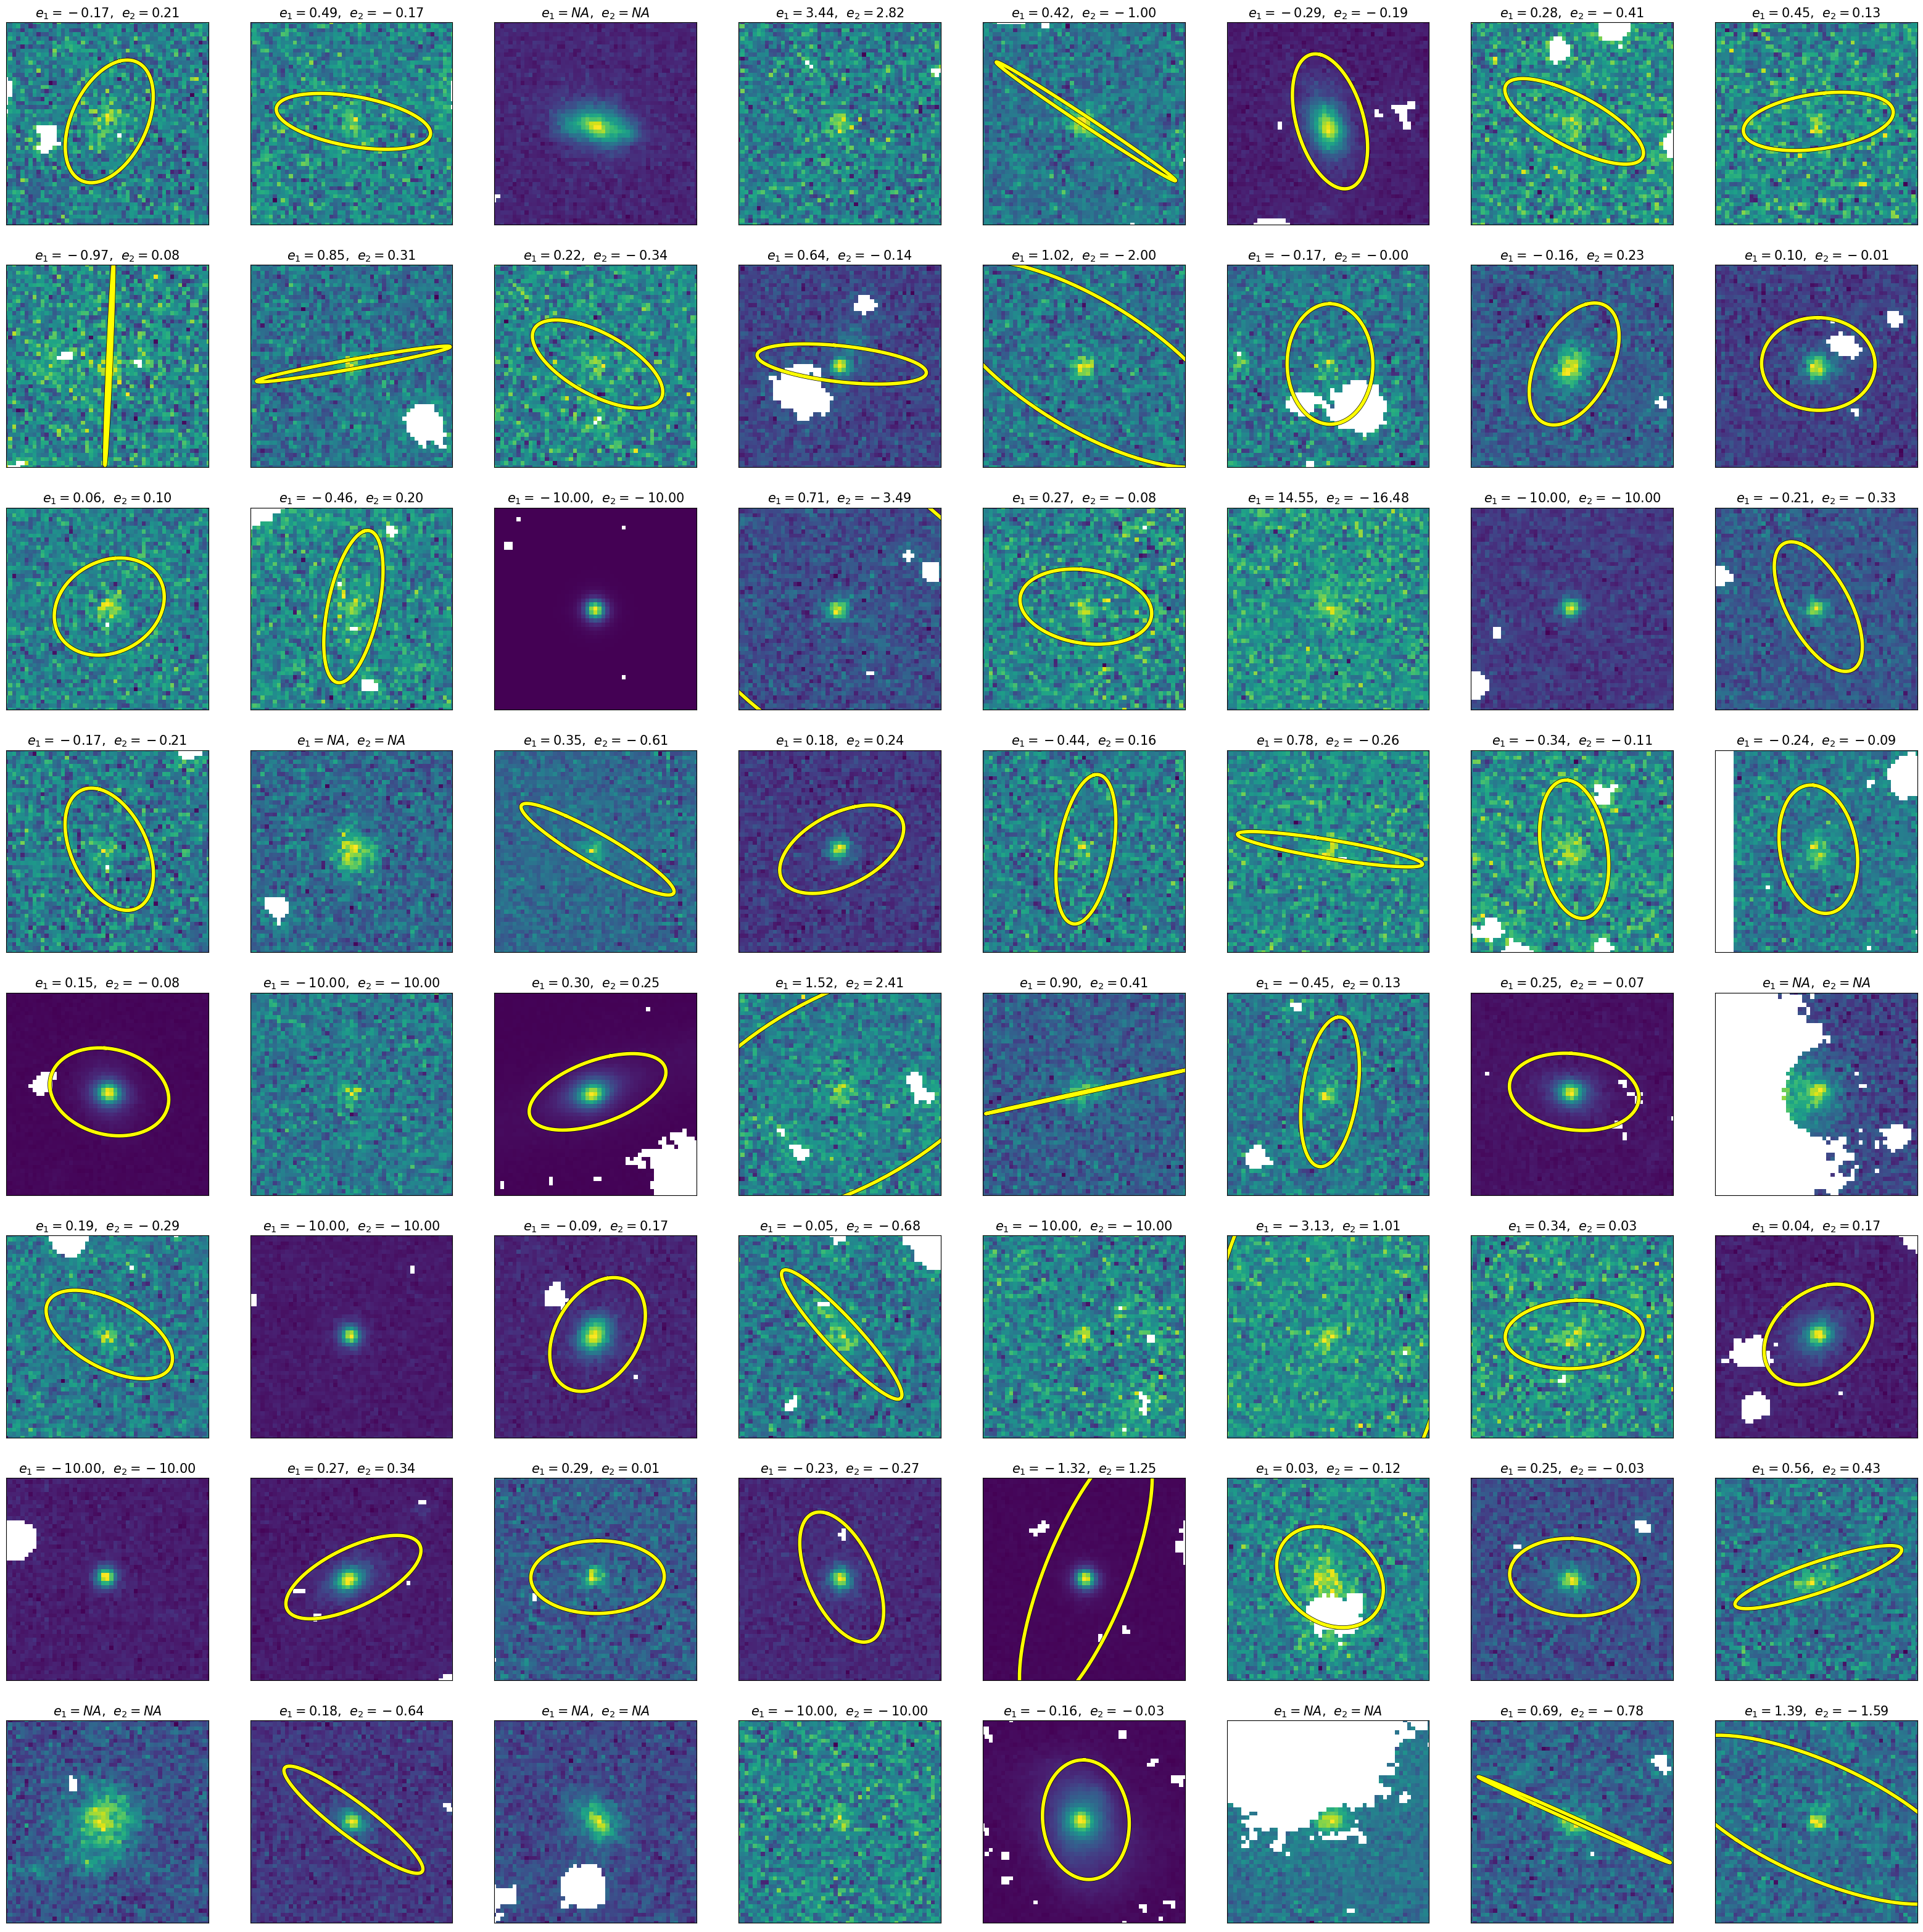

In [10]:
plt.figure(figsize=(40,40))
for i in range(N_sample):
    sub = plt.subplot(plotlines,plotcols,i+1)
    index = sample[i]
    
    stamp = np.array(subcat[index]['VIGNET'])
    masked_stamp = np.ma.masked_where(stamp == -1e+30, stamp)
    sub.imshow(masked_stamp)
    
    identity = subcat[index]['NUMBER']
    g1 = shearcatgalsim[shearcatgalsim['id']==identity]['gal_g1']
    g2 = shearcatgalsim[shearcatgalsim['id']==identity]['gal_g2']

    try:
        g1 = float(g1)
        g2 = float(g2)
        elipse = ellipse(size=stamp_size/4)
        sheared_elipse = shear(elipse,g1,g2,0)
        sub.plot(sheared_elipse[:,0]+stamp_size/2,
                 sheared_elipse[:,1]+stamp_size/2,
                 color='yellow',
                 lw=4, 
                 path_effects=[pfx.Stroke(linewidth=5, foreground='k'), pfx.Normal()])
        sub.set_title("$e_1 = {:.2f}$,  $e_2 = {:.2f}$".format(g1,g2),fontsize=15)
    except:
        sub.set_title("$e_1 = NA $,  $e_2 = NA$",fontsize=15)
    
    #plot configs
    sub.tick_params(labelleft=False,left=False)
    sub.axes.get_xaxis().set_visible(False)
    sub.set_xlim(0,stamp_size-1)
    sub.set_ylim(0,stamp_size-1)

plt.savefig(images_dir+
            "/shapepipe_cfis_test_subprocess{}_epoch{}_galsim_{}.png".format(subproc,epoch,time.time()),
            bbox_inches='tight') 


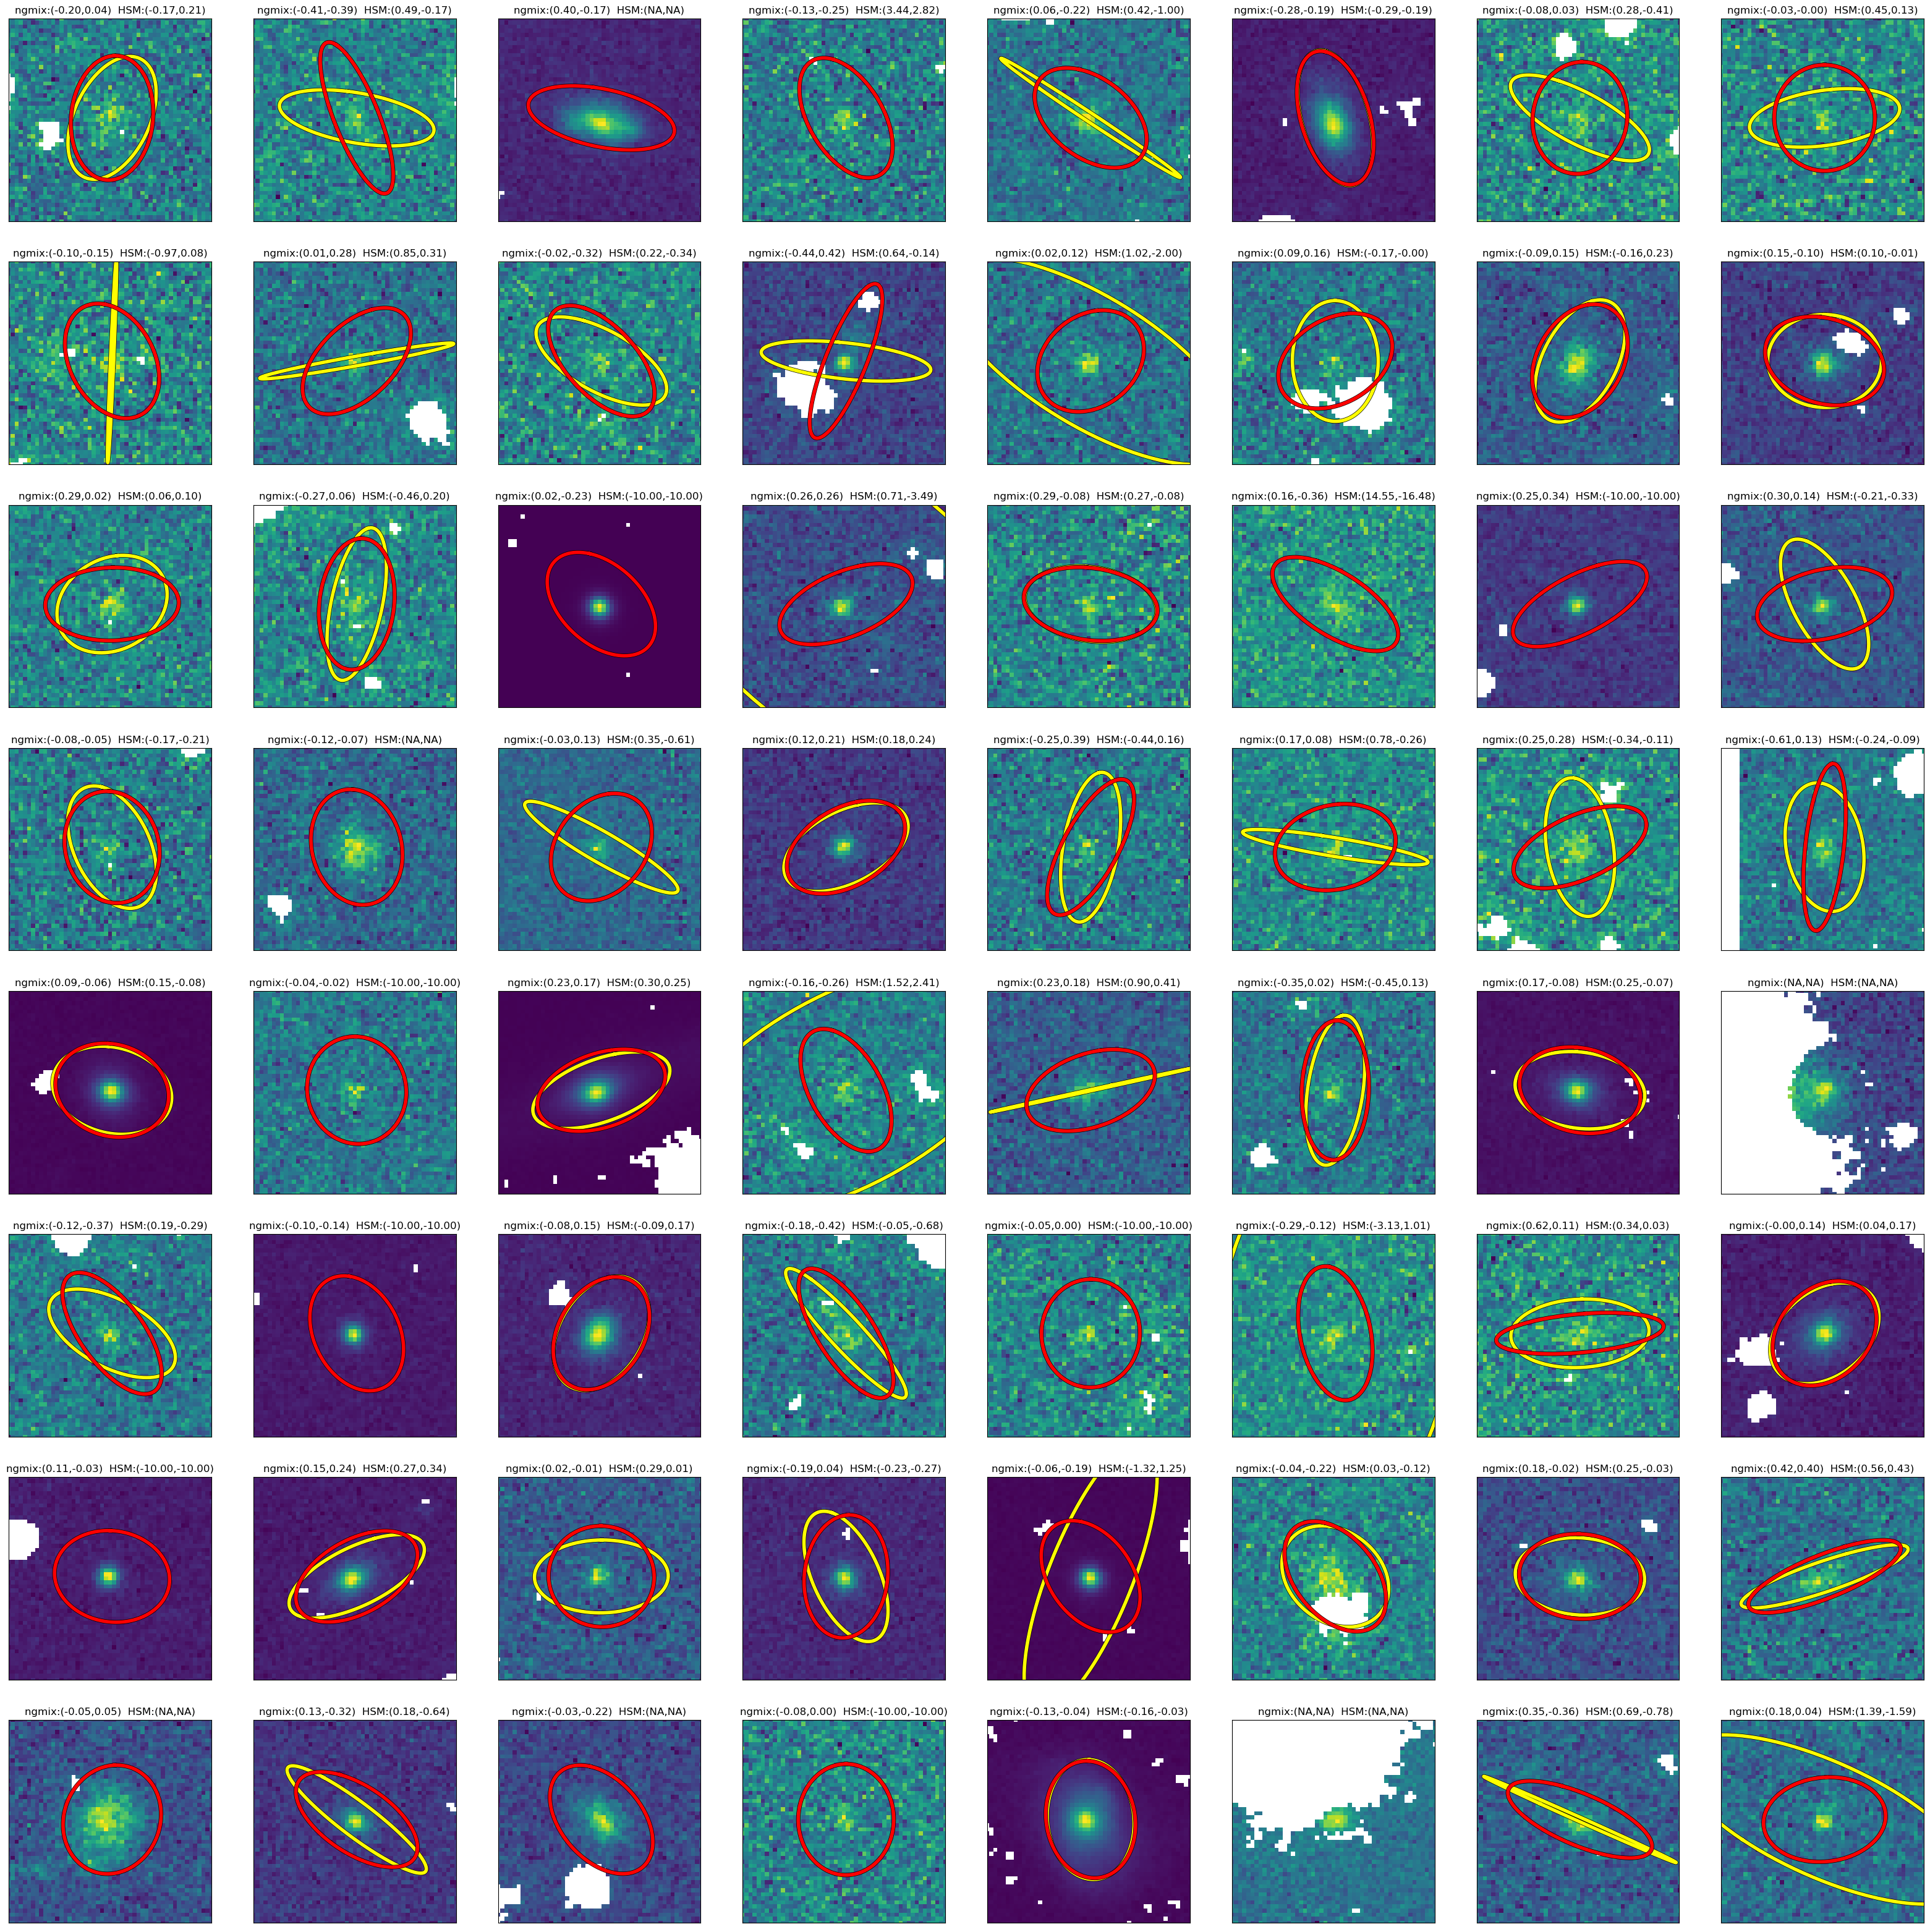

In [11]:
plt.figure(figsize=(40,40))

for i in range(N_sample):
    sub = plt.subplot(plotlines,plotcols,i+1)
    index = sample[i]
    
    stamp = np.array(subcat[index]['VIGNET'])
    masked_stamp = np.ma.masked_where(stamp == -1e+30, stamp)
    sub.imshow(masked_stamp)
    
    identity = subcat[index]['NUMBER']
    g1galsim = shearcatgalsim[shearcatgalsim['id']==identity]['gal_g1']
    g2galsim = shearcatgalsim[shearcatgalsim['id']==identity]['gal_g2']

    try:
        #galsim ellipse
        g1 = float(g1galsim)
        g2 = float(g2galsim)
        galsim_title = "({:.2f},{:.2f})".format(g1,g2)
        elipse = ellipse(size=stamp_size/4)
        sheared_elipse = shear(elipse,g1,g2,0)
        sub.plot(sheared_elipse[:,0]+stamp_size/2,
                 sheared_elipse[:,1]+stamp_size/2,
                 color='yellow',
                 lw=4, 
                 path_effects=[pfx.Stroke(linewidth=5, foreground='k'), pfx.Normal()])
    except:
        galsim_title = "(NA,NA)"

    g1ngmix= shearcatngmix[shearcatngmix['id']==identity]['g1']
    g2ngmix= shearcatngmix[shearcatngmix['id']==identity]['g2']
    
    try:
        #ngmixellipse
        g1 = float(g1ngmix)
        g2 = float(g2ngmix)
        ngmix_title = "({:.2f},{:.2f})".format(g1,g2)
        elipse = ellipse(size=stamp_size/4)
        sheared_elipse = shear(elipse,g1,g2,0)
        sub.plot(sheared_elipse[:,0]+stamp_size/2,
                 sheared_elipse[:,1]+stamp_size/2,
                 color='red',
                 lw=4, 
                 path_effects=[pfx.Stroke(linewidth=5, foreground='k'), pfx.Normal()])
        
    except:
        ngmix_title = "(NA,NA)"
    
    #plot configs
    sub.set_title("ngmix:" +ngmix_title + "  HSM:" + galsim_title, fontsize=12)
    sub.axes.get_xaxis().set_visible(False)
    sub.tick_params(labelleft=False,left=False)
    sub.set_xlim(0,stamp_size-1)
    sub.set_ylim(0,stamp_size-1)

plt.savefig(images_dir+
            "/shapepipe_cfis_test_subprocess{}_epoch{}_galsim_vs_ngmix_{}.png".format(subproc,epoch,time.time()),
            bbox_inches='tight') 
